In [18]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from graph_stats import GraphStats
from graph_comparison import GraphPairCompare

In [3]:
orig_g = nx.read_edgelist('./dumps/graphs/grenoble/grenoble.g'); orig_g.name = 'grenoble'
orig_gs = GraphStats(orig_g, model='orig', dataset='grenoble', iteration=-1, trial=-1)

In [14]:
# read pickles
chung_lu = pickle.load(open('./dumps/graphs/grenoble/CL.pkl.gz', 'rb'))[1]
cnrg = pickle.load(open('./dumps/graphs/grenoble/CNRG.pkl.gz', 'rb'))[1]
sbm = pickle.load(open('./dumps/graphs/grenoble/SBM.pkl.gz', 'rb'))[1]
vrg = pickle.load(open('./dumps/graphs/grenoble/vrg.pkl', 'rb'))[0]

In [16]:
cl_gs = GraphStats(chung_lu, model='CL', dataset='grenoble')
cnrg_gs = GraphStats(cnrg, model='CNRG', dataset='grenoble')
sbm_gs = GraphStats(sbm, model='SBM', dataset='grenoble')
vrg_gs = GraphStats(vrg, model='VRG', dataset='grenoble')

In [17]:
for gs in (cl_gs, cnrg_gs, sbm_gs, vrg_gs):
    gpc = GraphPairCompare(gstats1=orig_gs, gstats2=gs)
    print(f'{gs.model} D_JS: {round(gpc.degree_js(), 4)} PR_JS: {round(gpc.pagerank_js(), 4)}')

CL D_JS: 0.0388 PR_JS: 0.2068
CNRG D_JS: 0.0907 PR_JS: 0.0749
SBM D_JS: 0.3101 PR_JS: 0.1908
VRG D_JS: 0.0373 PR_JS: 0.027


In [19]:
rows = {'model': ['Chung Lu', 'CNRG', 'SBM', 'VRG'], 
        'degree_js': [0.0388, 0.0907, 0.3101, 0.0373],
        'pagerank_js': [0.2068, 0.0749, 0.1908, 0.027]}
df = pd.DataFrame(rows)

In [20]:
df

,model,degree_js,pagerank_js
0,Chung Lu,0.0388,0.2068
1,CNRG,0.0907,0.0749
2,SBM,0.3101,0.1908
3,VRG,0.0373,0.0270


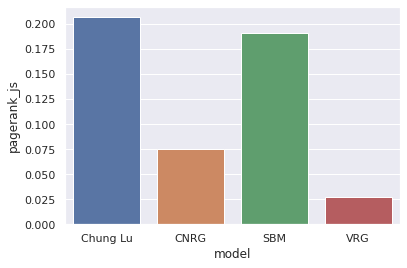

In [23]:
sns.barplot(x='model', y='pagerank_js', data=df);